In [12]:
import os
import cv2
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image





labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

data_dir = "C:/ML/MAW/brains"
print(os.listdir(data_dir))


['glioma', 'meningioma', 'notumor', 'pituitary']


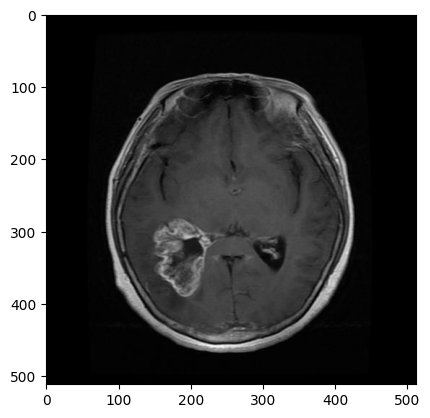

In [13]:
glioma_img = Image.open("C:/ML/MAW/brains/glioma/gl-0001.jpg")
plt.imshow(glioma_img,"gray")
plt.show()

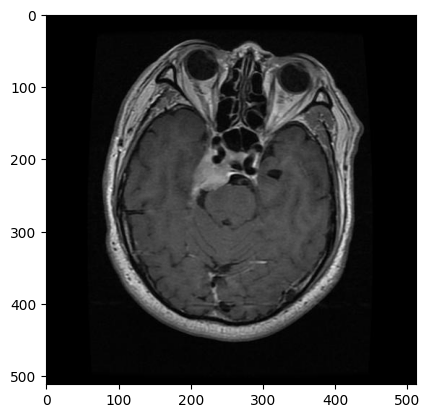

In [14]:
meningioma_img = Image.open("C:/ML/MAW/brains/meningioma/me-1688.jpg")
plt.imshow(meningioma_img,"gray")
plt.show()

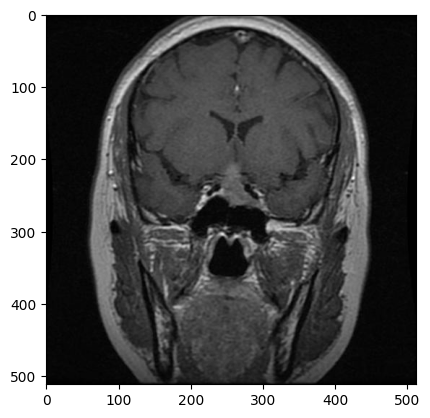

In [15]:
pituitary_img = Image.open("C:/ML/MAW/brains/pituitary/pi-1756.jpg")
plt.imshow(pituitary_img,"gray")
plt.show()

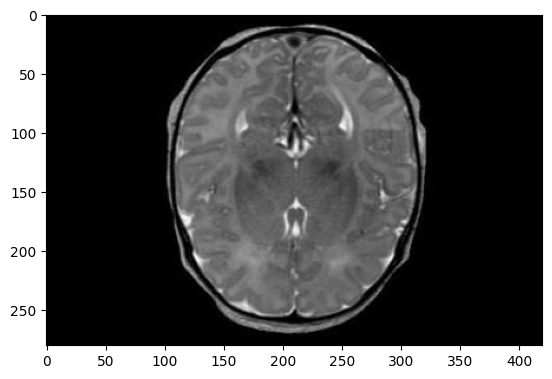

In [16]:
no_tumor_img = Image.open("C:/ML/MAW/brains/notumor/no-1497.jpg")
plt.imshow(no_tumor_img)
plt.show()



In [17]:
image_size = 150

X = []
y = []

def load_images(folder_path,label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path,filename)
        img = cv2.imread(img_path)
        if img is not None:
                img = cv2.resize(img, (image_size,image_size))
                images.append(img)
                labels.append(label)


    return np.array(images), np.array(labels)


for index, label in enumerate(labels):
    path = os.path.join(data_dir, label)
    images, image_labels = load_images(path,index)
    X.extend(images)
    y.extend(image_labels)

X = np.array(X, dtype="float32")
y = np.array(y,dtype="int64")


from tensorflow.keras.utils import to_categorical
y = to_categorical(y)


100%|█████████████████████████████████████████████████████████████████████████████| 1757/1757 [00:01<00:00, 884.89it/s]


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=42)
X_train.shape,X_test.shape

X_train = X_train.reshape((-1,image_size,image_size,3)) / 255.0
X_test = X_test.reshape((-1,image_size,image_size,3)) / 255.0

X_train.shape,X_test.shape

((6437, 150, 150, 3), (716, 150, 150, 3))

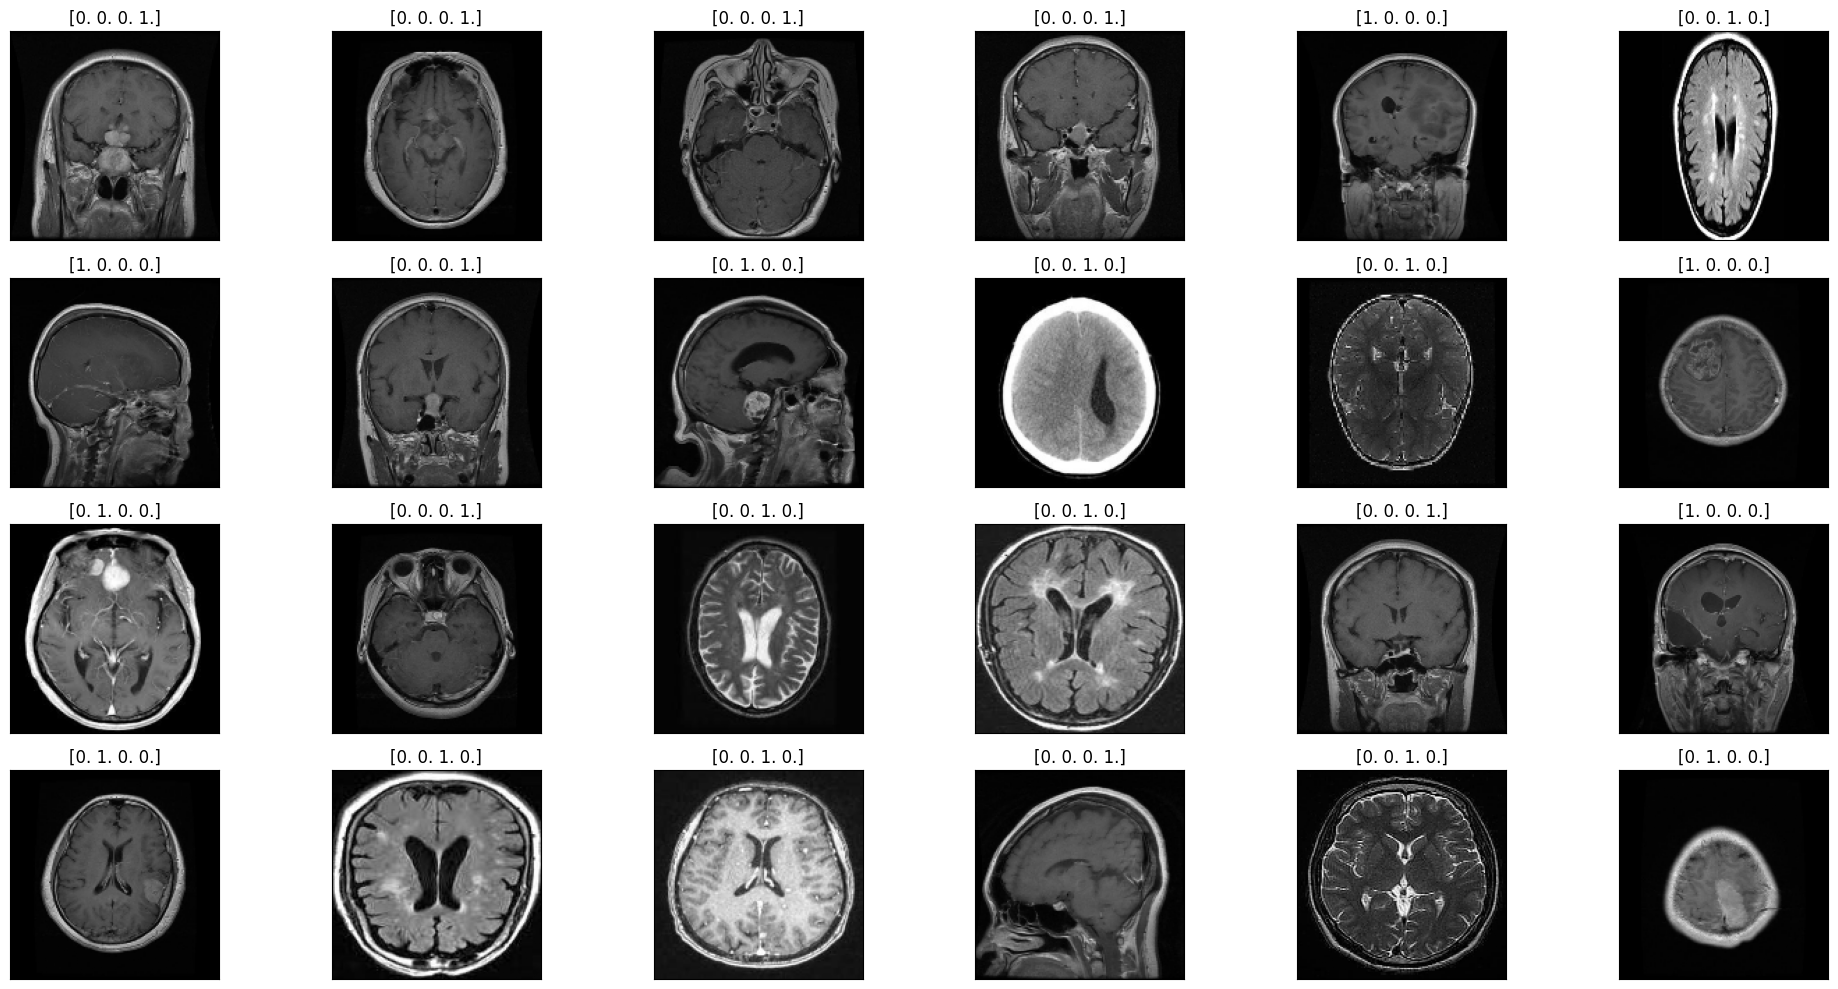

In [19]:
idx = np.random.choice(np.arange(len(X_train)),24,replace=False)

fig,axs = plt.subplots(4,6,figsize=(20,10))

for item in zip(axs.ravel(),X_train[idx],y_train[idx]):
    axs,image,target = item
    axs.imshow(image)
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_title(target)


plt.tight_layout()
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization


CNN = Sequential()
CNN.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(150,150,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))


CNN.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Flatten())

CNN.add(Dense(512,activation='relu'))
CNN.add(Dense(4,activation='softmax'))
CNN.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
history = CNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)
loss,accuracy = CNN.evaluate(X_test,y_test)
print("testing loss",loss)
print("testing accuracy:",accuracy)

pred = CNN.predict(X_test)

Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 74s 396ms/step - accuracy: 0.6466 - loss: 6.4062 - val_accuracy: 0.2469 - val_loss: 23.4053
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 75s 414ms/step - accuracy: 0.8624 - loss: 0.3844 - val_accuracy: 0.6693 - val_loss: 0.9269
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 74s 405ms/step - accuracy: 0.9324 - loss: 0.1911 - val_accuracy: 0.7935 - val_loss: 0.5410
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 72s 398ms/step - accuracy: 0.9068 - loss: 0.2628 - val_accuracy: 0.9130 - val_loss: 0.2229
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 73s 403ms/step - accuracy: 0.9497 - loss: 0.1347 - val_accuracy: 0.9425 - val_loss: 0.1783
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 73s 402ms/step - accuracy: 0.9785 - loss: 0.0642 - val_accuracy: 0.9581 - val_loss: 0.1285
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 70s 384ms/step - accuracy: 0.9766 - loss: 0.0697 - val_accuracy: 0.9441 - val_loss: 0.1717
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 69s 377ms/step - accuracy: 0.9735 - loss: 

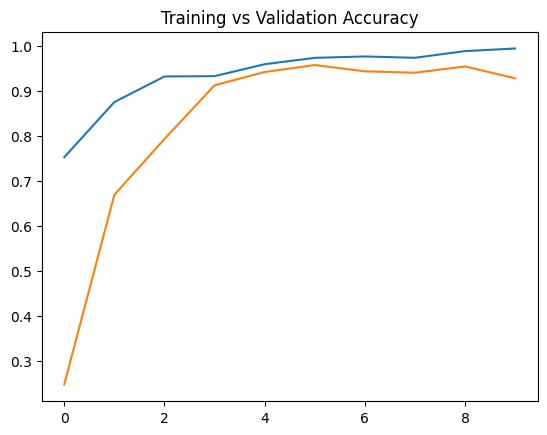

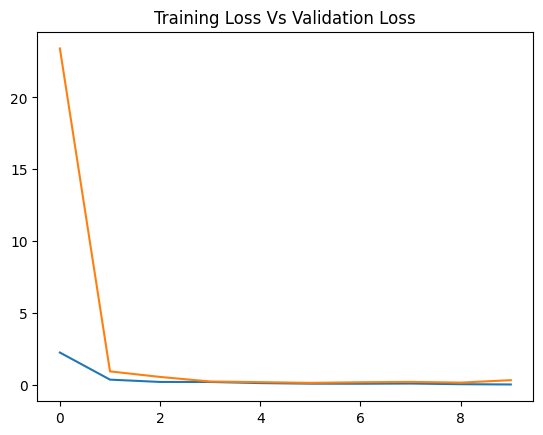

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training Loss Vs Validation Loss")
plt.show()


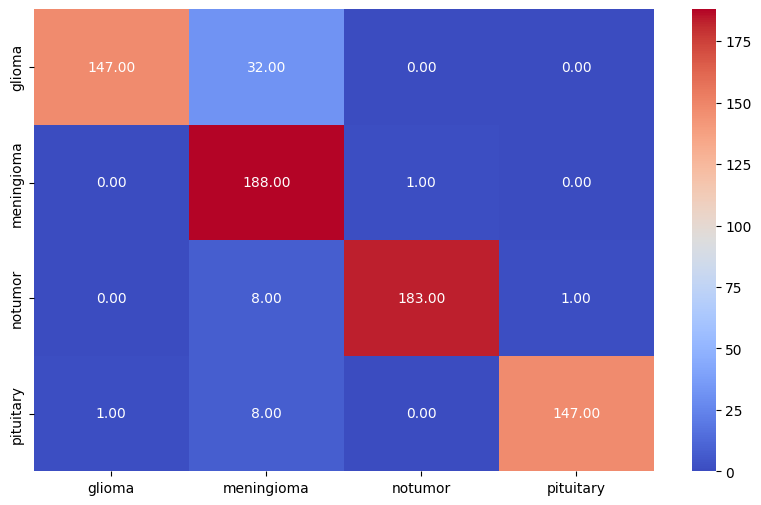

Classification Report from CNN:               precision    recall  f1-score   support

           0       0.99      0.82      0.90       179
           1       0.80      0.99      0.88       189
           2       0.99      0.95      0.97       192
           3       0.99      0.94      0.97       156

    accuracy                           0.93       716
   macro avg       0.94      0.93      0.93       716
weighted avg       0.94      0.93      0.93       716



In [24]:
## ^^ ISH


from sklearn.metrics import classification_report,confusion_matrix



y_true = np.argmax(y_test,axis=1)
y_pred = np.argmax(pred,axis=1)


conf_matrix = confusion_matrix(y_true,y_pred)


plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='.2f',cmap='coolwarm',xticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'], yticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'])
plt.show()




clf_rpt=  classification_report(y_true, y_pred)
print(f"Classification Report from CNN: {clf_rpt}")

